#Imports and downloads

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/your_dataframe3.csv')

Number of students and teachers

In [ ]:
len(df)

6096

In [ ]:
df.head()

,Names,Emails,Roles,Courses
0,Aaron Köndgen,aaron.koendgen@students.finki.ukim.mk,Student,Консултации@Машинска визија-Machine Vision 202...
1,Anastasija Cvetanovic,anastasija.cvetanovic@students.finki.ukim.mk,Student,Консултации@Интернет програмирање на клиентска...
2,Anchev Nenad,nenad.anchev@finki.ukim.mk,Teacher,ННС@ФИНКИ@Консултации@Студентски информативен ...
3,Andonov Stefan,stefan.andonov@finki.ukim.mk,Teacher,ННС@ФИНКИ@Консултации@Студентски информативен ...
4,Anil Cinar-Kapacuoglu,cinar.kapucuoglu.anil@students.finki.ukim.mk,Student,Консултации@Студентски информативен центар@Bus...


TO DO: In order for the identity of the students to not be compromised we can encode their names.

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# df['Names'] = label_encoder.fit_transform(df['Names'])


In [ ]:
# df.head()

#Defining groups

We can identify all of the different courses/chats each student and professor attends.

In [ ]:
groups = set()
for index, row in df.iterrows():
    line_courses = row['Courses'].split('@')
    for c in line_courses:
      groups.add(c)

In [ ]:
len(groups)

2239

Here are the first 10 groups

In [ ]:
for i,key in enumerate(groups):
  if i < 10:
    print(key)

Вреднување и тестирање на софтверот-2016/2017/Z
Сервисно ориентирани архитектури - 2009/2010 - Зимски - 4год
Компјутерски мрежи и безбедност - СГ, ИМ, ММ, ДС - 2022/2023/Z
Виртуелизирани податочни центри-2019/2020/Z
Објектно и визуелно програмирање - 4 годишни - 2008/2009 - Летен семестар
Софтверски квалитет и тестирање-2016/2017/L
Современи компјутерски системи - 2011/2012 - Зимски - 4 год
Психологија на училишна возраст-2022/2023/L
Социјални мрежи и медиуми-2023/2024/Z
Алгоритми и податочни структури-2013/2014/Z


In [ ]:
j = 0
past_courses = set()
for elem in groups:
  for i in range(2009, 2015):
    if str(i) in elem:
      past_courses.add(elem)
      if j < 10:
        print(elem)
        j+=1

len(past_courses)

Сервисно ориентирани архитектури - 2009/2010 - Зимски - 4год
Сервисно ориентирани архитектури - 2009/2010 - Зимски - 4год
Објектно и визуелно програмирање - 4 годишни - 2008/2009 - Летен семестар
Современи компјутерски системи - 2011/2012 - Зимски - 4 год
Современи компјутерски системи - 2011/2012 - Зимски - 4 год
Алгоритми и податочни структури-2013/2014/Z
Алгоритми и податочни структури-2013/2014/Z
Калкулус 2 - 2011/2012 - Зимски - 4 год
Калкулус 2 - 2011/2012 - Зимски - 4 год
Современи компјутерски системи - 2009/2010 - Зимски - 4год


701

There are 701 course from 2008 to 2015 that are irrelevant. There could be more irrelevant courses depending on which year we want to set as the starting year from which we choose all the courses.

Defining a dataset for the users which have Role = Student

#Groups with missing values

##Groups that have no year attached to them

In [ ]:
no_year_groups = set()
for group in groups:
  in_if = False
  for year in range(2008,2025):
    if str(year) in group or str(year)[-2:] in group:
      in_if = True
  if not in_if:
    no_year_groups.add(group)

In [ ]:
no_year_groups

{'Algorithms and data structures',
 'Microsoft MVC',
 'Test',
 'VI-SEEM test course',
 'Аналитика на големи податоци',
 'ЕТЕСТ Тест',
 'ИКТ во образование – експериментален курс',
 'ИКТ во образованието - експериментален курс',
 'Интеракција човек-компјутер (втор циклус)',
 'Консултации',
 'ННС',
 'Напредни теми од вештачка интелигенција и машинско учење',
 'Пишување и презентирање на научен труд',
 'Прекалкулус',
 'Препрограмирање',
 'Студентски информативен центар',
 'Студентски информативен центар - втор циклус',
 'УПРАВА',
 'ФИНКИ'}

Clearing away conflicts that can emerge from these no year groups

##get_students__by_course() implementation

In [ ]:
df["Roles"].unique()

array(['Student', 'Teacher', 'Non-editing teacher'], dtype=object)

In [ ]:
#get all the students with that course name and print them
def get_students__by_course(course, neighbours= False, count=2, num = 4, student=True, debug=True):
  students = []
  for index, row in df.iterrows():
      if student and  row['Roles']=="Student":
        pass
      elif not student and  row['Roles']=="Teacher":
        pass
      else:continue
      courses= row['Courses']
      for c in courses.split("@"):
        if c == course:
          students.append(row)

  m = min(len(students), count)
  if student:
    if debug:
      print(f"Count students: {len(students)}")
  else:
    if debug:
      print(f"Count professors: {len(students)}")

  for s in students[0:m]:
      if debug:
        if student:
          print(f"Name: {s['Names']}, Courses: {s['Courses'].split('@')}")
        if not student:
          print(f"{s['Names']}")

      if student:
        courses = s['Courses'].split('@')
        if neighbours:
          ind = courses.index(course)
          start = max(0, ind-num)
          end = min(ind+num, len(courses))
          for c in courses[start:ind]:
            if debug:
              print(f"\t{c}")
          if debug:
            print(f"------->{course}")
          for c in courses[ind+1:end]:
            if debug:
              print(f"\t{c}")
  if student:
    return len(students)

In [ ]:
for g in no_year_groups:
  get_students__by_course(g, True, 1, 6)

Count students: 3
Name: Арсова Ангела, Courses: ['Консултации', 'Студентски информативен центар', 'Алгоритми и податочни структури-2023/2024/Z', 'Дискретна математика 2-2022/2023/L', 'Алгоритми и податочни структури-2022/2023/Z', 'Дискретна математика 2-2021/2022/L', 'Алгоритми и податочни структури-2021/2022/Z', 'Дипломска работа-2020/2021/L', 'Дискретна математика 2-2020/2021/L', 'Алгоритми и податочни структури-2020/2021/Z', 'Дипломска работа-2019/2020/L', 'Дискретна математика 2-2019/2020/L', 'Оперативни системи-2019/2020/L', 'Алгоритми и податочни структури-2019/2020/Z', 'Дизајн на образовен софтвер-2019/2020/Z', 'Географски информациски системи 2018-2019', 'Дискретна математика 2-2018/2019/L', 'Оперативни системи-2018/2019/L', 'Учење на далечина-2018/2019/L', 'Алгоритми и податочни структури -2018/2019/Z', 'Бази на податоци - ГВ - 2018/2019/Z', 'Интерактивни апликации-2018/2019/Z', 'Мрежи од следната генерација-2018/2019/Z', 'Напреден веб дизајн-2018/2019/Z', 'Вовед во когнитивни

Microsoft MVC -

In [ ]:
get_students__by_course("Интеракција човек-компјутер (втор циклус)", True, 10, 10)

Count students: 0


0

In [ ]:
get_students__by_course("Microsoft MVC", True, 10, 10)

Count students: 2
Name: Златков Борис, Courses: ['Консултации', 'Студентски информативен центар', 'Бази на податоци - СК-КТ-ГМ-СГ-2022/2023/Z', 'Алгоритми и податочни структури-2022/2023/Z', 'Дизајн и архитектура на софтвер-2022/2023/Z', 'Интернет технологии - ГА,МК - 2021/2022/L', 'Оперативни системи-2021/2022/L', 'Софтверско инженерство-2021/2022/L', 'Учење на далечина-2021/2022/L', 'Бази на податоци - ГВ - 2021/2022/Z', 'Бази на податоци - ГВ - 2020/2021/Z', 'Софтверско инженерство 2018/2019 - Летен - ДЃ,ЃМ,КТ', 'Математика 1-2018/2019/Z', 'Мобилни апликации-2017/2018/L', 'Софтверско инженерство 2017/2018 - Летен - ДЃ,ЃМ', 'Бази на податоци - ВА - 2017/2018/Z', 'Microsoft MVC', 'Софтверско инженерство 2016/2017 - Летен - ДЃ,ЃМ', 'Софтверско инженерство 2015/2016 - Летен - КЗ', 'Бази на податоци - ГВ - 2015/2016/Z', 'Софтверско Инженерство-2014/2015/L', 'Дискретни структури 2 - 2011/2012 - Летен - 4 год', 'Калкулус 2 - 2011/2012 - Летен - 3 и 4 год', 'Компјутерски архитектури - 2011/

2

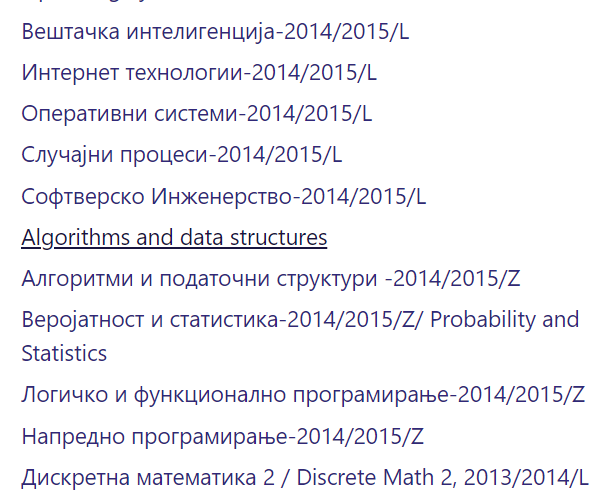

All of the courses are ordered by themselves before they were fetched. They are ordered in the faculty site. So, for the courses that have no year, or semester type, we can deduce these values from the neighbours.

###Fixing some problems

In [ ]:
no_year_str = '''Прекалкулус:Прекалкулус-2013/2014/Z
ИКТ во образованието - експериментален курс: ИКТ во образованието - експериментален курс-2014/2015/L
Препрограмирање:Препрограмирање-2013/2014/Z
Algorithms and data structures:Algorithms and data structures-2014/2015/Z
Аналитика на големи податоци:Аналитика на големи податоци-2019/2020/Z
Напредни теми од вештачка интелигенција и машинско учење:Напредни теми од вештачка интелигенција и машинско учење-2022/2023/Z
Microsoft MVC:Microsoft MVC-2016/2017/L'''
li = no_year_str.split("\n")
no_year_m = {}
for elem in li:
  key, value = elem.split(":")
  no_year_m[key] = value
no_year_m

{'Прекалкулус': 'Прекалкулус-2013/2014/Z',
 'ИКТ во образованието - експериментален курс': ' ИКТ во образованието - експериментален курс-2014/2015/L',
 'Препрограмирање': 'Препрограмирање-2013/2014/Z',
 'Algorithms and data structures': 'Algorithms and data structures-2014/2015/Z',
 'Аналитика на големи податоци': 'Аналитика на големи податоци-2019/2020/Z',
 'Напредни теми од вештачка интелигенција и машинско учење': 'Напредни теми од вештачка интелигенција и машинско учење-2022/2023/Z',
 'Microsoft MVC': 'Microsoft MVC-2016/2017/L'}

In [ ]:
for index, row in df.iterrows():
    line_courses = row['Courses'].split('@')
    new_courses = []
    for c in line_courses:
        if c in no_year_m:
            c = no_year_m[c]
        new_courses.append(c)
    c = "@".join(new_courses)
    df.at[index, 'Courses'] = c

In [ ]:
groups = set()
for index, row in df.iterrows():
    line_courses = row['Courses'].split('@')
    for c in line_courses:
      groups.add(c)

In [ ]:
no_year_groups = set()
for group in groups:
  in_if = False
  for year in range(2008,2025):
    if str(year) in group or str(year)[-2:] in group:
      in_if = True
  if not in_if:
    no_year_groups.add(group)

In [ ]:
no_year_groups

{'Test',
 'VI-SEEM test course',
 'ЕТЕСТ Тест',
 'ИКТ во образование – експериментален курс',
 'Интеракција човек-компјутер (втор циклус)',
 'Консултации',
 'ННС',
 'Пишување и презентирање на научен труд',
 'Студентски информативен центар',
 'Студентски информативен центар - втор циклус',
 'УПРАВА',
 'ФИНКИ'}

In [ ]:
for index, row in df.iterrows():
    line_courses = row['Courses'].split('@')
    new_courses = []
    for c in line_courses:
        if c not in no_year_groups:
          new_courses.append(c)
    c = "@".join(new_courses)
    df.at[index, 'Courses'] = c

In [ ]:
groups = set()
for index, row in df.iterrows():
    line_courses = row['Courses'].split('@')
    for c in line_courses:
      groups.add(c)

In [ ]:
no_year_groups = set()
for group in groups:
  in_if = False
  for year in range(2008,2025):
    if str(year) in group or str(year)[-2:] in group:
      in_if = True
  if not in_if:
    no_year_groups.add(group)

In [ ]:
no_year_groups

{''}

In [ ]:
for g in no_year_groups:
  get_students__by_course(g, True)

Count students: 29
Name: Webadmin FINKI, Courses: ['']
------->
Name: Александар Јањиќ, Courses: ['']
------->


In [ ]:
get_students__by_course("Microsoft MVC", True)

Count students: 0


0

In [ ]:
get_students__by_course("Аналитика на големи податоци", True)

Count students: 0


0

In [ ]:
get_students__by_course("ИКТ во образование - експериментален курс", True)

Count students: 0


0

In [ ]:
#Интеракција човек-компјутер (втор циклус)
get_students__by_course("Интеракција човек-компјутер (втор циклус)", True)

Count students: 0


0

In [ ]:
#Прекалкулус
get_students__by_course("Прекалкулус", True)

Count students: 0


0

##Groups that only have one year in them

In [ ]:
one_year_groups = set()
for group in groups:
  in_if = False
  for year in range(2008,2025):
    if (str(year) in group or str(year)[-2:] in group) and (str(year+1) in group or str(year+1)[-2:] in group):
      in_if = True
  if not in_if and group not in no_year_groups:
    one_year_groups.add(group)

In [ ]:
one_year_groups

{'Microprocessor Systems Fall 2015',
 'Стручни студии – ВВКН -2023',
 'Стручни студии – Интернет програмирање -2023',
 'Стручни студии – СП -2023'}

In [ ]:
#Microprocessor Systems Fall 2015
get_students__by_course("Microprocessor Systems Fall 2015", True, 1, 10)

Count students: 1
Name: Златанова Симона, Courses: ['Веројатност и статистика-2022/2023/Z', 'Веројатност и статистика-2021/2022/Z', 'Микропроцесорски системи-2021/2022/Z', 'Дигитални библиотеки-2017/2018/L', 'Дигитално процесирање на сигнали-2017/2018/L', 'е-Влада-2017/2018/L', 'Компјутерски компоненти 2017-2018', 'Кориснички интерфејси-2017/2018/L', 'Веројатност и статистика-2017/2018/Z', 'Интерактивни апликации-2017/2018/Z', 'ИТ системи за учење-2017/2018/Z', 'Криптографија-2017/2018/Z', 'Микропроцесорски системи-2017/2018/Z', 'Мобилни платформи и програмирање-2017/2018/Z', 'Безжични и мобилни системи-2016/2017/L', 'Вовед во биоинформатика-2016/2017/L', 'Вовед во когнитивни науки-2016/2017/L', 'Компјутерска анимација-2016/2017/L', 'Софтверски квалитет и тестирање-2016/2017/L', 'Databases - 2016/2017/Z', 'Microprocessor Systems - 2016/2017/Z', 'Веројатност и статистика-2016/2017/Z', 'Микропроцесорски системи-2016/2017/Z', 'Напредно програмирање-2016/2017/Z', 'Системи на знаење-2016/20

1

###Fixing some problems

In [ ]:
one_year_str = '''Microprocessor Systems Fall 2015:Microprocessor Systems Fall 2015/2016/Z
Стручни студии – ВВКН -2023:Стручни студии – ВВКН -2023/2024/Z
Стручни студии – Интернет програмирање -2023:Стручни студии – Интернет програмирање -2023/2024/Z
Стручни студии – СП -2023:Стручни студии – СП -2023/2024/Z'''
li = one_year_str.split("\n")
one_year_m = {}
for elem in li:
  key, value = elem.split(":")
  one_year_m[key] = value
one_year_m

{'Microprocessor Systems Fall 2015': 'Microprocessor Systems Fall 2015/2016/Z',
 'Стручни студии – ВВКН -2023': 'Стручни студии – ВВКН -2023/2024/Z',
 'Стручни студии – Интернет програмирање -2023': 'Стручни студии – Интернет програмирање -2023/2024/Z',
 'Стручни студии – СП -2023': 'Стручни студии – СП -2023/2024/Z'}

In [ ]:
for index, row in df.iterrows():
    line_courses = row['Courses'].split('@')
    new_courses = []
    for c in line_courses:
        if c in one_year_m:
            c = one_year_m[c]
        new_courses.append(c)
    c = "@".join(new_courses)
    df.at[index, 'Courses'] = c

In [ ]:
groups = set()
for index, row in df.iterrows():
    line_courses = row['Courses'].split('@')
    for c in line_courses:
      groups.add(c)

In [ ]:
one_year_groups = set()
for group in groups:
  in_if = False
  for year in range(2008,2025):
    if (str(year) in group or str(year)[-2:] in group) and (str(year+1) in group or str(year+1)[-2:] in group):
      in_if = True
  if not in_if and group not in no_year_groups:
    one_year_groups.add(group)

In [ ]:
one_year_groups

set()

#Creating student dataframe

In [ ]:
df_s = df[df['Roles'] == 'Student'].reset_index(drop=True)

In [ ]:
print(f"Number of students: {len(df_s)}")

Number of students: 5998


In [ ]:
df_s.head()

,Names,Emails,Roles,Courses
0,Aaron Köndgen,aaron.koendgen@students.finki.ukim.mk,Student,Машинска визија-Machine Vision 2022-23
1,Anastasija Cvetanovic,anastasija.cvetanovic@students.finki.ukim.mk,Student,Интернет програмирање на клиентска страна-2023...
2,Anil Cinar-Kapacuoglu,cinar.kapucuoglu.anil@students.finki.ukim.mk,Student,Business 2023/2024/Z@Mathematics 1 / Calculus ...
3,Anisa Salihi,anisa.salihi@students.finki.ukim.mk,Student,Professional skills-2023/2024/Z@Structured pro...
4,Atanasovska Sara,sara.atanasovska@students.finki.ukim.mk,Student,Бизнис и менаџмент-2020/2021/Z@Вовед во компју...


#Enrollment year for students

In [ ]:
rows_to_drop = []
enrollment_year=[]
without_enrollment = []
for index, row in df_s.iterrows():
    courses= row['Courses']
    in_if = False
    for year in range(2008,2025):
      if str(year) in courses:
        enrollment_year.append(int(year))
        in_if = True
        break
    if not in_if:
      enrollment_year.append(None)
      without_enrollment.append(f"Name: {row['Names']}, Courses: {row['Courses'].split('@')} ")
      rows_to_drop.append(index)


In [ ]:
print(f"There are {len(without_enrollment)} students without an enrollment year.\nHere are the students and all of their courses:")
for elem in without_enrollment:
  print(elem)

There are 29 students without an enrollment year.
Here are the students and all of their courses:
Name: Webadmin FINKI, Courses: [''] 
Name: Александар Јањиќ, Courses: [''] 
Name: Александар Саздовски, Courses: [''] 
Name: Борис Дедејски, Courses: [''] 
Name: Горазд Петрушевски, Courses: [''] 
Name: Горан Митров, Courses: [''] 
Name: Диме Бошковски, Courses: [''] 
Name: Драгана Милошеска, Courses: [''] 
Name: Катерина Јангеловска, Courses: [''] 
Name: Марија Атанасова, Courses: [''] 
Name: Методија Новковски, Courses: [''] 
Name: Мила Јовановска, Courses: [''] 
Name: Милена Ѓорѓиевска Перушеска, Courses: [''] 
Name: Наќе Давчев, Courses: [''] 
Name: Никола Нацевски, Courses: [''] 
Name: Никола Томиќ, Courses: [''] 
Name: Огнен Спироски, Courses: [''] 
Name: Орданоски Петар, Courses: [''] 
Name: Славчо Иванов, Courses: [''] 
Name: Стаменковска Ема, Courses: [''] 
Name: Стефан Анчевски, Courses: [''] 
Name: Стефан Павлов, Courses: [''] 
Name: Стефан Невеселов, Courses: [''] 
Name: Тамара

All of these students are not in any other group except for "Консултации" which mean that they don't attribute anything to our study. Also, Webadmin FINKI, is not a Student, even though they have the role student. We can drop all of these rows.

In [ ]:
df_s = df_s.drop(rows_to_drop).reset_index(drop=True)

In [ ]:
enrollment_year = []
for index, row in df_s.iterrows():
    courses= row['Courses']
    in_if = False
    for year in range(2008,2025):
      if str(year) in courses:
        enrollment_year.append(int(year))
        in_if = True
        break
    if not in_if:
      enrollment_year.append(None)
      print(row["Name"])

In [ ]:
print(f'After deleting these rows df_s length is: {len(df_s)}')

After deleting these rows df_s length is: 5969


In [ ]:
df_s["Enrollment Year"] = enrollment_year

df_s with added Enollment Year

In [ ]:
df_s.head()

,Names,Emails,Roles,Courses,Enrollment Year
0,Aaron Köndgen,aaron.koendgen@students.finki.ukim.mk,Student,Машинска визија-Machine Vision 2022-23,2022
1,Anastasija Cvetanovic,anastasija.cvetanovic@students.finki.ukim.mk,Student,Интернет програмирање на клиентска страна-2023...,2023
2,Anil Cinar-Kapacuoglu,cinar.kapucuoglu.anil@students.finki.ukim.mk,Student,Business 2023/2024/Z@Mathematics 1 / Calculus ...,2022
3,Anisa Salihi,anisa.salihi@students.finki.ukim.mk,Student,Professional skills-2023/2024/Z@Structured pro...,2023
4,Atanasovska Sara,sara.atanasovska@students.finki.ukim.mk,Student,Бизнис и менаџмент-2020/2021/Z@Вовед во компју...,2019


In [ ]:
unique_counts = df_s["Enrollment Year"].value_counts()

print(unique_counts)

2022    1198
2021    1018
2023     995
2019     751
2020     596
2018     501
2017     320
2016     211
2015     128
2014      98
2013      67
2012      47
2011      27
2008       7
2010       3
2009       2
Name: Enrollment Year, dtype: int64


##Plots

In [ ]:
import plotly.express as px
import pandas as pd

fig = px.pie(
    names=unique_counts.index,
    values=unique_counts.values,
    title='Enrollment Year Distribution'
)

fig.show()

In [ ]:
fig = px.histogram(
    df_s,
    x='Enrollment Year',
    title='Enrollment Year Distribution',
    labels={'Enrollment Year': 'Year', 'count': 'Frequency'},
)

fig.show()

##Study programs over the years

There are mainly three study programs over the years:
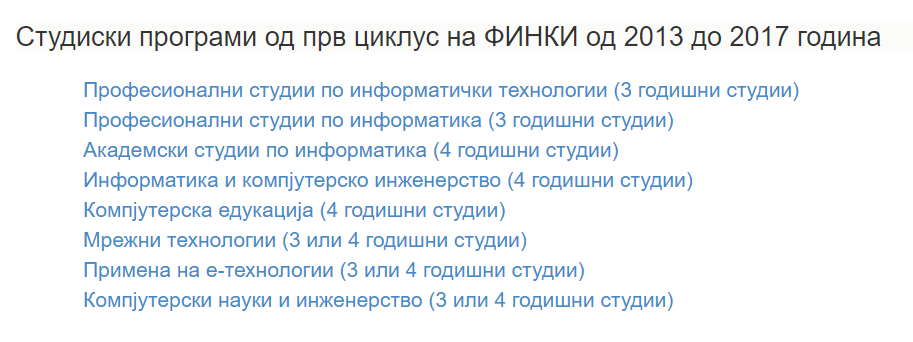
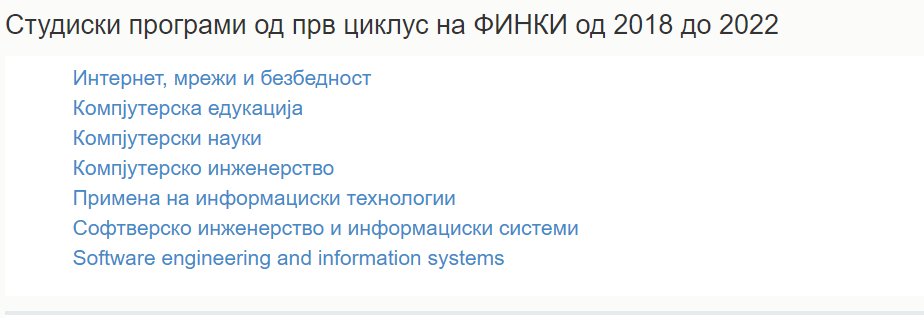
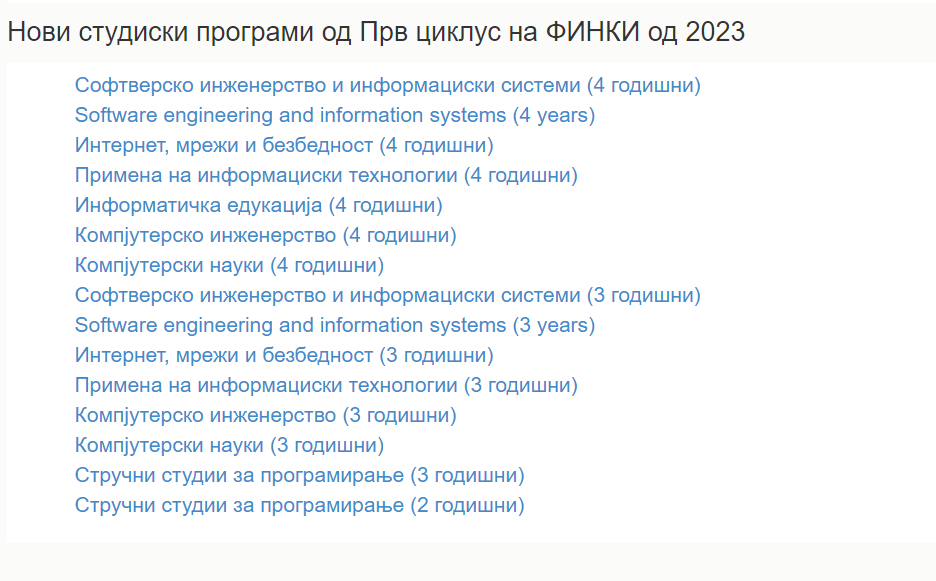

In [ ]:
count = (df_s['Enrollment Year'] >= 2018).sum()
print(f"Number of students which are part of studies from 2018 or later: {count}")
percent_compared_to_all = (float(count) / len(df_s)) * 100
print(f"Percent compared to all: {percent_compared_to_all:.2f}%")

Number of students which are part of studies from 2018 or later: 5059
Percent compared to all: 84.75%


Nearly 85% of all students enrolled in 2018 or later. This study will use only theses students, because they encompase the last two changes in the study program.

###Creating a new dataset from enrollment year >= 2018


In [ ]:
df_18 = df_s[df_s['Enrollment Year'] >= 2018].reset_index(drop=True)

In [ ]:
len(df_18)

5059

##Enrollment on active students

In [ ]:
li = ['Стручни студии – ВВКН -2023',
 'Стручни студии – Интернет програмирање -2023',
 'Стручни студии – СП -2023']

In [ ]:
row_indexes = set()
for index, row in df_s.iterrows():
    courses= row['Courses']
    year = 2023
    for c in courses.split("@"):
      if ((str(year) in c or str(year)[-2:] in c) and (str(year+1) in c or str(year+1)[-2:] in c)) or c in li:
        row_indexes.add(index)
        if index > len(df_s):
            print(index)


In [ ]:
df_a = df_s.iloc[list(row_indexes)]

In [ ]:
counts_a = df_a["Enrollment Year"].value_counts()
counts_a

2023    995
2022    988
2021    841
2020    576
2019    511
2018    326
2017    192
2016    101
2015     65
2014     53
2013     39
2012     27
2011      7
2008      4
2010      1
Name: Enrollment Year, dtype: int64

###Plots

In [ ]:
df_comparison = pd.concat([df_a["Enrollment Year"], df_s["Enrollment Year"]], axis=1, keys=['active', 'all time'])

fig = px.histogram(
    df_comparison,
    facet_col="variable",
    color_discrete_sequence=['blue', 'orange'],
    category_orders={"Enrollment Year": sorted(pd.concat([df_a["Enrollment Year"], df_s["Enrollment Year"]]).unique())},
    labels={'value': 'Count', 'variable': 'DataFrame', 'Enrollment Year': 'Year'},
    title='Comparison of Enrollment Year for active and all time students',
)

fig.show()

In [ ]:
df_comparison = pd.concat([df_a["Enrollment Year"], df_s["Enrollment Year"]], axis=1, keys=['df_a', 'df_s'])

fig = px.histogram(
    df_comparison,
    color_discrete_sequence=['blue', 'orange'],
    category_orders={"Enrollment Year": sorted(pd.concat([df_a["Enrollment Year"], df_s["Enrollment Year"]]).unique())},
    labels={'value': 'Count', 'variable': 'DataFrame', 'Enrollment Year': 'Year'},
    title='Comparison of Enrollment Year',
    opacity=0.7,
    barmode='overlay',
)

fig.show()

#Students and number of groups

In [ ]:
num_groups= []
for index, row in df_s.iterrows():
    line_courses = row['Courses'].split('@')
    num_groups.append(len(line_courses))

In [ ]:
df_s["Num Groups"] = num_groups

In [ ]:
missing_values_count = df_s['Num Groups'].isnull().sum()
missing_values_count

0

In [ ]:
unique_values = df_s['Num Groups'].unique()

print("Unique values in the 'Num Groups' column:")
unique_values

Unique values in the 'Num Groups' column:


array([  1,   4,  20,   7,   3,  15,   6,   5,  42,   2,  14,  10,  54,
        18,  36,  11,  62,  56,  26,  55,  49,  44,  47,  30,  65,  46,
        16,  73,  77,  45,  68,  28,  48,  38,  37,  40,  50,  27,  41,
        61,  25,  43,  51,  39,  22,  53,  32,  13,  57,  19,   8,  59,
        60,  74,  69,  81,  58,  29,  63,  87,  35,  52,  24,  64,  34,
        31,  21,  75,  71,  99,  33,  76,  94,  78,  80,  17,  92,  72,
       106,  79,  70, 132,  96,  88,  67,  93,  66,  95, 120,  91,  98,
        83, 101,  12,  82, 109,  85,  23,   9,  86, 102, 104,  89,  84,
       116, 121, 108,  90, 107, 113, 115])

##Histogram of Num Groups

In [ ]:
fig = px.histogram(df_s, x='Num Groups', nbins=100, title='Histogram of Num Groups')

fig.show()

##Updating df_18 with Num Groups

In [ ]:
df_18 = df_s[df_s['Enrollment Year'] >= 2018].reset_index(drop=True)


In [ ]:
len(df_18)/len(df_s)*100

84.75456525381135

In [ ]:
df_18 = df_s[(df_s['Enrollment Year'] >= 2013) & (df_s['Enrollment Year'] < 2022)].reset_index(drop=True)


In [ ]:
len(df_18)

3690

In [ ]:
len(df_18)/len(df_s)*100

61.81940023454515

In [ ]:
df_1 = df_18[df_18['Num Groups'] >= 10].reset_index(drop=True)
len(df_1)
len(df_1)/len(df_s)*100

58.63628748534093

In [ ]:
df_2 = df_s[df_s['Num Groups'] >= 10].reset_index(drop=True)
len(df_2)

4598

#Defining year to the courses

In [ ]:
for index, row in df.iterrows():
    line_courses = row['Courses'].split('@')
    new_courses = []
    for c in line_courses:
      for year in range(2018,2024):
        if (str(year) in c or str(year)[-2:] in c) and (str(year+1) in c or str(year+1)[-2:] in c):
          new_courses.append(c)
    c = "@".join(new_courses)
    df.at[index, 'Courses'] = c

In [ ]:
df.columns

Index(['Names', 'Emails', 'Roles', 'Courses'], dtype='object')

In [ ]:
df.head(3)

,Names,Emails,Roles,Courses
0,Aaron Köndgen,aaron.koendgen@students.finki.ukim.mk,Student,Машинска визија-Machine Vision 2022-23
1,Anastasija Cvetanovic,anastasija.cvetanovic@students.finki.ukim.mk,Student,Интернет програмирање на клиентска страна-2023...
2,Anchev Nenad,nenad.anchev@finki.ukim.mk,Teacher,Test course - 2019/2020/L@Databases-2023/2024/...


In [ ]:
course = []
name = []
email = []
role = []
for index, row in df.iterrows():
  courses = row["Courses"].split("@")
  for c in courses:
    course.append(c)
    name.append(row["Names"])
    email.append(row["Emails"])
    role.append(row["Roles"])

In [ ]:
data = {'Name': name, 'Email': email, 'Role': role,'Course': course}
df_all = pd.DataFrame(data)

df_all.head()

,Name,Email,Role,Course
0,Aaron Köndgen,aaron.koendgen@students.finki.ukim.mk,Student,Машинска визија-Machine Vision 2022-23
1,Anastasija Cvetanovic,anastasija.cvetanovic@students.finki.ukim.mk,Student,Интернет програмирање на клиентска страна-2023...
2,Anastasija Cvetanovic,anastasija.cvetanovic@students.finki.ukim.mk,Student,Компјутерска етика-2023/2024/Z
3,Anastasija Cvetanovic,anastasija.cvetanovic@students.finki.ukim.mk,Student,Пресметување во облак-2023/2024/Z
4,Anastasija Cvetanovic,anastasija.cvetanovic@students.finki.ukim.mk,Student,Програмирање на видео игри-2023/2024/Z


In [ ]:
import re

In [ ]:
s = set()
inds=[]
for index, row in df_all.iterrows():
  integers = [int(match) for match in re.findall(r'\d+', row["Course"])]
  if len(integers) < 1:
    integers.append( row["Course"])
    s.add(tuple(integers))
    inds.append(index)
print(s)

{('',)}


In [ ]:
df_all.drop(inds, inplace=True)

In [ ]:
s = set()
inds=[]
for index, row in df_all.iterrows():
  integers = [int(match) for match in re.findall(r'\d+', row["Course"])]
  if integers[-1] == 1 or integers[-2] == 1:
    s.add(row["Course"])
s

{'Мобилни информациски системи-2022/2023/Z copy 1'}

In [ ]:
for index, row in df_all.iterrows():
  integers = [int(match) for match in re.findall(r'\d+', row["Course"])]
  if integers[-1] == 1 or integers[-2] == 1:
    df_all.at[index, 'Course'] = c.replace("copy 1", "")

In [ ]:
s = set()
inds=[]
for index, row in df_all.iterrows():
  integers = [int(match) for match in re.findall(r'\d+', row["Course"])]
  if integers[-1] == 1 or integers[-2] == 1:
    s.add(row["Course"])
s

set()

In [ ]:
s = set()
inds=[]
year = []
for index, row in df_all.iterrows():
  integers = [int(match) for match in re.findall(r'\d+', row["Course"])]
  tmp = integers[-1]
  tmp1 = integers[-2]
  if len(str(integers[-1])) == 2:
    tmp = 2000+integers[-1]
  if len(str(integers[-2])) == 2:
    tmp1 = 2000+integers[-2]
  if tmp>tmp1:
     a = tmp
     tmp = tmp1
     tmp1 = a
  year.append(str(tmp)+"/"+str(tmp1))
s

set()

In [ ]:
df_all["Year"] = year

In [ ]:
df_all.head()

,Name,Email,Role,Course,Year
0,Aaron Köndgen,aaron.koendgen@students.finki.ukim.mk,Student,Машинска визија-Machine Vision 2022-23,2022/2023
1,Anastasija Cvetanovic,anastasija.cvetanovic@students.finki.ukim.mk,Student,Интернет програмирање на клиентска страна-2023...,2023/2024
2,Anastasija Cvetanovic,anastasija.cvetanovic@students.finki.ukim.mk,Student,Компјутерска етика-2023/2024/Z,2023/2024
3,Anastasija Cvetanovic,anastasija.cvetanovic@students.finki.ukim.mk,Student,Пресметување во облак-2023/2024/Z,2023/2024
4,Anastasija Cvetanovic,anastasija.cvetanovic@students.finki.ukim.mk,Student,Програмирање на видео игри-2023/2024/Z,2023/2024


#Connecting course to subject

In [ ]:
!gdown 1b7t7hPuydvNfrchwLJr-z7clLjY4rQ75

Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/gdown/cli.py", line 156, in main
    filename = download(
  File "/usr/local/lib/python3.10/dist-packages/gdown/download.py", line 259, in download
    filename_from_url = m.groups()[0]
AttributeError: 'NoneType' object has no attribute 'groups'


In [ ]:
subjects = pd.read_csv('/content/drive/MyDrive/subjects.csv')

In [ ]:
fr = subjects[subjects["Name_x"].str.contains("Калкулус", case=False, na=False)]
subjects[subjects["Name_x"]=="Калкулус"]
fr.iloc[0]["Name_x"]

'Калкулус'

In [ ]:
subjects.head(1)

,Name_x,Code_x,Content_x,Description,Prerequisite,Weekly_x,Id,Level_x,Semester Type_x,Name_y,Name_English,Code_y,Requirements,Content_y,Level_y,Semester Type_y,Weekly_y
0,Бизнис и менаџмент,F18L1W005,"Развој на менаџерски способности: техничка, ко...","Развој на менаџерски способности: техничка, ко...",NaN,Основни поими и дефиниции на менаџмент; претпр...,L1W005,1.0,W,Бизнис и менаџмент,Business and Management,F23L1W005,NaN,"Развој на менаџерски способности: техничка, ко...",1.0,W,Предавања:\t1. Менаџерите на своето работно ме...


In [ ]:
courses = set()
inds=[]
year = []
for index, row in df_all.iterrows():
  courses.add(row["Course"])

In [ ]:
subjects.columns

Index(['Name_x', 'Code_x', 'Content_x', 'Description', 'Prerequisite',
       'Weekly_x', 'Id', 'Level_x', 'Semester Type_x', 'Name_y',
       'Name_English', 'Code_y', 'Requirements', 'Content_y', 'Level_y',
       'Semester Type_y', 'Weekly_y'],
      dtype='object')

In [ ]:
d_df = pd.read_excel('/content/drive/MyDrive/connection5.xlsx')

In [ ]:
d_df.columns

Index(['Unnamed: 0', 'Subject_Id', 'Subject', 'Course-abr', 'Course', 'Label'], dtype='object')

In [ ]:
corr = {}
for i, row in d_df.iterrows():
  if row["Label"] == 1:
    corr[row['Course-abr']] = row['Subject']

In d we connect all of the courses with their subjects and ids. Later we will use this dict to add subjects to the df_all.

In [ ]:
from tqdm import tqdm
s = {}
s1 = set()
d = {}



for course in tqdm(courses):
    lol = course
    course = course.lower()
    integers = [int(match) for match in re.findall(r'\d+', course)]
    course = course.replace(str(integers[-1]), "")
    course = course.replace(str(integers[-2]), "")

    if course in corr:
      course = corr[course].lower()

    connected = False

    for index1, row1 in subjects.iterrows():
        name18 = row1["Name_x"]
        name23 = row1["Name_y"]
        name_е = row1["Name_English"]

        if not pd.isna(name18):
            name18 = name18.lower()
            if name18 in course:
                connected = True
                d[lol] = (row1["Name_x"], row1["Id"])


        if not connected and not pd.isna(name23):
            name23 = name23.lower()
            if name23 in course:
                connected = True
                d[lol] = (row1["Name_y"], row1["Id"])

        if not connected and not pd.isna(name_е):
            name_е = name_е.lower()
            if name_е in course:
                connected = True
                d[lol] = (row1["Name_English"], row1["Id"])



    if not connected:
        if course not in s:
          s[course] = []
        s[course].append(lol)
        s1.add(lol)

# Print the set of courses not connected
print("Courses not connected:", s)

100%|██████████| 1031/1031 [00:24<00:00, 42.46it/s]

Courses not connected: {'развојни процеси на информациски системи-//l': ['Развојни процеси на информациски системи-2019/2020/L', 'Развојни процеси на информациски системи-2020/2021/L'], 'менаџмент на човечки ресурси-//z': ['Менаџмент на човечки ресурси-2021/2022/Z', 'Менаџмент на човечки ресурси-2022/2023/Z', 'Менаџмент на човечки ресурси-2020/2021/Z', 'Менаџмент на човечки ресурси-2019/2020/Z', 'Менаџмент на човечки ресурси-2018/2019/Z', 'Менаџмент на човечки ресурси-2023/2024/Z'], 'дигитална електроника-//l': ['Дигитална електроника-2019/2020/L', 'Дигитална електроника-2020/2021/L', 'Дигитална електроника-2018/2019/L'], 'виртуелизирани податочни центри-//z': ['Виртуелизирани податочни центри-2019/2020/Z', 'Виртуелизирани податочни центри-2021/2022/Z', 'Виртуелизирани податочни центри-2022/2023/Z'], 'електротехника и компјутерски науки -': ['Електротехника и компјутерски науки 2018-2019', 'Електротехника и компјутерски науки 2019-2020', 'Електротехника и компјутерски науки 2020-2021',

In [ ]:
len(s1)

192

Add the connected subjects to the course

In [ ]:
df_all.columns

Index(['Name', 'Email', 'Role', 'Course', 'Year'], dtype='object')

In [ ]:
import numpy as np

In [ ]:
c_subjects = []
c_ids = []
for index, row in df_all.iterrows():
  if row['Course'] in d:
    c_subjects.append(d[row['Course']][0])
    c_ids.append(d[row['Course']][1])
  else:
    c_subjects.append(np.nan)
    c_ids.append(np.nan)

In [ ]:
len(c_subjects) == len(df_all)

True

In [ ]:
c_subjects[0:10]

['Машинска визија',
 'Интернет програмирање на клиентска страна',
 'Компјутерска етика',
 'Пресметување во облак',
 'Програмирање на видео игри',
 nan,
 'Databases',
 'Алгоритми и податочни структури',
 'Бази на податоци',
 'Дистрибуирани системи']

Create a new column named subject.

In [ ]:
df_all["Subject"] = c_subjects
df_all["Subject_Id"] = c_ids

In [ ]:
filtered_df = df_all[df_all["Subject"].isna()]

In [ ]:
len(filtered_df)

5849

In [ ]:
filtered_df = df_all[df_all["Subject"].isna()]

In [ ]:
len(filtered_df)

5849

In [ ]:
s = {}
for i,row in filtered_df.iterrows():
  course = row["Course"].lower()
  integers = [int(match) for match in re.findall(r'\d+', course)]
  course = course.replace(str(integers[-1]), "")
  course = course.replace(str(integers[-2]), "")
  if course not in s:
    s[course] = []
  s[course].append(row["Course"])

Those courses that are missing a subject, print all of them which have number of stundets higher than 50.

In [ ]:
s1 = set()
for key in tqdm(s):
    num = get_students__by_course(s[key][0], neighbours= False, count=0, num = 0, student=True, debug=False)
    if num > 50:
      s1.add(key)

100%|██████████| 81/81 [00:36<00:00,  2.25it/s]


In [ ]:
s1

{'апсолвенти финки-//z',
 'вовед во интернет-//z',
 'ка-/',
 'системи на знаење-//z',
 'системска анализа и дизајн -'}

In [ ]:
len(df_all)

209989

In [ ]:
len(df_all[df_all["Subject"].isna()])

0

In [ ]:
len(df_all[df_all["Subject"].isna()])/len(df_all)*100

2.785383996304568

In [ ]:
df_all.dropna(subset=["Subject"], inplace=True)

In [ ]:
df_all["Subject"].isna().sum()

0

In [ ]:
len(df_all)

204140

In [ ]:
df_all.to_csv("/content/drive/MyDrive/students_courses.csv")

Име на курс:

Професори:

Предмет:

In [ ]:
s = set()
for ind, row in df_all.iterrows():
  s.add(row["Course"])

In [ ]:
s

{'Algorithms and Data Structures - 2018/2019/Z',
 'Algorithms and Data Structures-2019/2020/Z',
 'Algorithms and Data Structures-2020/2021/Z',
 'Algorithms and Data Structures-2021/2022/Z',
 'Algorithms and Data Structures-2022/2023/Z',
 'Artificial Intelligence-2018/2019/S',
 'Computer Architecture and Organization-2018/2019/L',
 'Computer Architecture and Organization-2019/2020/L',
 'Computer Architecture and Organization-2020/2021/L',
 'Computer Architecture and Organization-2021/2022/L',
 'Computer Architecture and Organization-2022/2023/L',
 'Computer Networks - 2018/2019/Z',
 'Computer Networks and Security-2019/2020/Z',
 'Computer Networks and Security-2020/2021/Z',
 'Computer Networks and Security-2021/2022/Z',
 'Computer Networks and Security-2022/2023/Z',
 'Computer Networks and Security-2023/2024/Z',
 'Databases - 2018/2019/Z',
 'Databases - 2019/2020/Z',
 'Databases-2020/2021/Z',
 'Databases-2021/2022/Z',
 'Databases-2022/2023/Z',
 'Databases-2023/2024/Z',
 'Discrete Mathem

##Input the missing course-subject connections

In [ ]:
# set1 = set()
# for i,row in filtered_df.iterrows():
#   if row['Course'] not in set1:
#     content = subjects[subjects['Id'] == row["Subject_Id"]]["Content_y"].values[0]
#     weekly = subjects[subjects['Id'] == row["Subject_Id"]]["Weekly_y"].values[0]
#     if pd.isna(content):
#       content = subjects[subjects['Id'] == row["Subject_Id"]]["Content_x"].values[0]
#       weekly = subjects[subjects['Id'] == row["Subject_Id"]]["Weekly_x"].values[0]

#     s = f"Име на курс: {row['Course']}\n"
#     s+= f"Име на предмет: {row['Subject']}\n"
#     s+= f"Содржина: {content}\n"
#     s+= f"Опис: {weekly}\n"
#     print(get_students__by_course(elem, True, count=4, num = 100, student=False, debug=True))

#     set1.add(row['Course'])

In [ ]:
# len(c_subjects)

209989

In [ ]:
# d_df = pd.read_excel('/content/drive/MyDrive/connection5.xlsx')
# d_df.columns
# d = {}
# for i, row in d_df.iterrows():
#   if row["Label"] == 1:
#     d[row['Course-abr']] = row['Subject']

In [ ]:
# d_df.columns

Index(['Unnamed: 0', 'Subject_Id', 'Subject', 'Course-abr', 'Course', 'Label'], dtype='object')

In [ ]:
# d = {}
# for i, row in d_df.iterrows():
#   if row["Label"] == 1:
#     d[row['Course-abr']] = row['Subject']

In [ ]:
# d

{'structural programming-//z': 'Структурно програмирање',
 'object oriented programming-//l': 'Објектно-ориентирано програмирање',
 'computer architecture and organization-//l': 'Архитектура и организација на компјутери',
 'object oriented analysis and design-//l': 'Објектно ориентирана анализа и дизајн',
 'интерактивни апликации-//z': 'Шаблони за дизајн на кориснички интерфејси',
 'основи на роботика-//z': 'Основи на роботиката',
 'интернет програмирање-//z': 'Интернет програмирање на клиентска страна',
 'микропроцесорски системи-//z': 'Вградливи микропроцесорски системи',
 'кориснички интерфејси-//l': 'Дизајн на интеракцијата човек-компјутер',
 'компјутерска aнимација-//l': 'Компјутерска анимација',
 'emt-/': 'Електронска и мобилна трговија',
 'управување на икт проекти-//l': 'Управување со ИКТ проекти',
 'моделирање на бизнис процеси-//l': 'Моделирање и менаџирање на бизнис процеси',
 'имплементација на системи со отворен код (програмски практикум)-//z': 'Имплементација на системи с

In [ ]:
# df_all.columns

Index(['Name', 'Email', 'Role', 'Course', 'Year', 'Subject', 'Subject_Id'], dtype='object')

In [ ]:
# subjects = []
# subjects_ids = []
# for i, row in df_all.iterrows():
#     course = row["Course"].lower()
#     integers = [int(match) for match in re.findall(r'\d+', course)]
#     course = course.replace(str(integers[-1]), "")
#     course = course.replace(str(integers[-2]), "")
#     if not pd.isna(row["Subject"]):
#       if course == 'emt-/':
#         print("lol")
#       # else:
#       #   print("lol1")
#     else:
#       subjects.append(row["Subject"])
#       subjects_ids.append(row["Subject_Id"])
